<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:white;font-family:Verdana,sans-serif;font-size:16px;">
<h2>Evaluation improvements models</h2>

In this Jupyter notebook, we follow a procedure similar to that in the 'evaluation_baseline.jpynb'. Initially, we create sorted DataFrames for both the original and predicted values. A key difference in this notebook is the exclusion of outputs containing '2' or '3'. After filtering these values, we proceed to calculate four key metrics: Precision, Recall, F1-Score, and Matthews Correlation Coefficient. Additionally, we compute the ratios of '0's, '1's, '2's, and '3's for each individual component and for the dataset as a whole.

Furthermore, we have created a series of bar charts to visually assess the evolution and performance across different components. 

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import numpy as np

In [167]:
def transform_df(df_sheet):
    
    columns_to_drop = ['Interlocutor', 'Unnamed: 1']

    # Drop the specified columns
    df_sheet = df_sheet.drop(columns=columns_to_drop)
    # Drop the specified row (index 0)
    df_sheet = df_sheet.drop(index=0)
    df_subset = df_sheet.loc[0:30]
    transposed_df_sheet = df_subset.T
    transposed_df_sheet=transposed_df_sheet.reset_index(drop=True)
    columns_to_drop = [2, 5, 8, 19, 26]
    transposed_df_sheet=transposed_df_sheet.drop(columns=columns_to_drop)
    transposed_df_sheet.shape
    # Rename columns using the list
    columns_list_sheet = ['File', 'component_1', 'component_2', 'component_3',
                           'component_4', 'component_5', 'component_6', 'component_7',
                           'component_8', 'component_9', 'component_10', 'component_11',
                           'component_12', 'component_13', 'component_14', 'component_15',
                           'component_16', 'component_17', 'component_18', 'component_19',
                           'component_20', 'component_21', 'component_22', 'component_23', 'component_24']
    transposed_df_sheet.columns = columns_list_sheet
    return transposed_df_sheet

In [168]:
# Read sheets by index (0-based)
sheets_to_read = [0, 1]
dfjulio = pd.read_excel("../Valoració_Julio.xlsx", sheet_name=sheets_to_read)
df_sheet0_j = dfjulio[0]
df_sheet1_j = dfjulio[1]
df_sheet0_j = transform_df(df_sheet0_j)
df_sheet1_j = transform_df(df_sheet1_j)
dfsep = pd.read_excel("../Valoració_Septiembre.xlsx", sheet_name=sheets_to_read)
df_sheet0_s = dfsep[0]
df_sheet1_s = dfsep[1]
df_sheet0_s = transform_df(df_sheet0_s)
df_sheet1_s = transform_df(df_sheet1_s)

In [169]:
# Concatenate all dataframes in one step
all_dataframes = [df_sheet0_j, df_sheet0_s, df_sheet1_j, df_sheet1_s]
final_concatenated_df = pd.concat(all_dataframes, axis=0)

# Reset the index for the final dataframe
final_concatenated_df = final_concatenated_df.reset_index(drop=True)
# List of component columns to convert
components = [f'component_{i}' for i in range(1, 25)]

# Convert each component column to int
for component in components:
    final_concatenated_df[component] = final_concatenated_df[component].astype(int)

In [243]:
df = pd.read_csv("output_results_baseline_model_esp_finetune.csv")
df["File"] = df["File"].str.replace('.txt', '')
# Convert the "Result" column to a list of integers for every row
df['Result'] = df['Result'].apply(lambda x: ast.literal_eval(x))
# Create a DataFrame with each component in a separate column
df_components = pd.DataFrame(df['Result'].to_list(), columns=[f'component_{i+1}' for i in range(len(df['Result'].iloc[0]))])
# Concatenate the DataFrames
result_df = pd.concat([df['File'], df_components], axis=1)

In [244]:
filtered_df = final_concatenated_df[final_concatenated_df['File'].isin(result_df['File'])]

In [245]:
filtered_df_aligned = filtered_df.sort_values('File')
result_df_aligned = result_df.sort_values('File')
# Re-indexing both DataFrames to align their indices
filtered_df_aligned.reset_index(drop=True, inplace=True)
result_df_aligned.reset_index(drop=True, inplace=True)

In [246]:
components = [f'component_{i}' for i in range(1, 25)]

# Initialize lists to store the metrics for each component
precisions = []
recalls = []
f1_scores = []
mcc_scores = []
specificities = []

# Calculating metrics for each component
for component in components:
    true_labels = filtered_df_aligned[component].values
    predicted_labels = result_df_aligned[component].values

    # Filtering out the '2' and '3' values which are discarded predictions
    indices_to_keep = [i for i, x in enumerate(predicted_labels) if x not in [2, 3]]
    filtered_true_labels = [true_labels[i] for i in indices_to_keep]
    filtered_predicted_labels = [predicted_labels[i] for i in indices_to_keep]

    # Calculating metrics
    if filtered_true_labels:
        precision = precision_score(filtered_true_labels, filtered_predicted_labels)
        recall = recall_score(filtered_true_labels, filtered_predicted_labels)
        f1 = f1_score(filtered_true_labels, filtered_predicted_labels)
        mcc = matthews_corrcoef(filtered_true_labels, filtered_predicted_labels)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        mcc_scores.append(mcc)

# Displaying metrics
print("Metrics for each component:")
for i, component in enumerate(components):
    print(f"{component} - Precision: {precisions[i]}, Recall: {recalls[i]}, F1-Score: {f1_scores[i]}, MCC: {mcc_scores[i]}")

Metrics for each component:
component_1 - Precision: 0.8823529411764706, Recall: 0.9574468085106383, F1-Score: 0.9183673469387754, MCC: -0.0707549137677225
component_2 - Precision: 0.6382978723404256, Recall: 0.9090909090909091, F1-Score: 0.75, MCC: -0.18133397807751273
component_3 - Precision: 0.76, Recall: 0.95, F1-Score: 0.8444444444444444, MCC: -0.10954451150103321
component_4 - Precision: 0.5833333333333334, Recall: 0.9655172413793104, F1-Score: 0.7272727272727274, MCC: -0.11986582537134603
component_5 - Precision: 1.0, Recall: 0.9782608695652174, F1-Score: 0.989010989010989, MCC: 0.0
component_6 - Precision: 0.9148936170212766, Recall: 1.0, F1-Score: 0.9555555555555556, MCC: 0.42776012367243316
component_7 - Precision: 0.84, Recall: 1.0, F1-Score: 0.9130434782608696, MCC: 0.0
component_8 - Precision: 0.9423076923076923, Recall: 0.9245283018867925, F1-Score: 0.9333333333333333, MCC: -0.06598588053218754
component_9 - Precision: 0.9, Recall: 1.0, F1-Score: 0.9473684210526316, MCC: 

In [ ]:
# To calculate global metrics using all true labels and predicted labels together,
# first concatenate all the labels from each component into single arrays

global_true_labels = []
global_predicted_labels = []

for component in components:
    true_labels = filtered_df_aligned[component].values
    predicted_labels = result_df_aligned[component].values

    # Filtering out the '2' and '3' values which are discarded predictions
    indices_to_keep = [i for i, x in enumerate(predicted_labels) if x not in [2, 3]]
    global_true_labels.extend([true_labels[i] for i in indices_to_keep])
    global_predicted_labels.extend([predicted_labels[i] for i in indices_to_keep])

# Now calculate the global metrics using the concatenated arrays
global_precision = precision_score(global_true_labels, global_predicted_labels)
global_recall = recall_score(global_true_labels, global_predicted_labels)
global_f1 = f1_score(global_true_labels, global_predicted_labels)
global_mcc = matthews_corrcoef(global_true_labels, global_predicted_labels)

# Display global metrics
print("Global Metrics:")
print(f"Global Precision: {global_precision}")
print(f"Global Recall: {global_recall}")
print(f"Global F1-Score: {global_f1}")
print(f"Global MCC: {global_mcc}")

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(global_true_labels, global_predicted_labels)

# Extract TP, FP, TN, and FN from the confusion matrix
TP = confusion[1, 1]  # True Positives
FP = confusion[0, 1]  # False Positives
TN = confusion[0, 0]  # True Negatives
FN = confusion[1, 0]  # False Negatives

# Display the values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

In [186]:
# Function to plot bar charts
def plot_bar_chart(metrics, title, ylabel):
    plt.figure(figsize=(15, 8))
    plt.bar(components, metrics, color='skyblue')
    plt.xlabel('Components')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.savefig('ratio_of_1s_components_.png')
    plt.show()


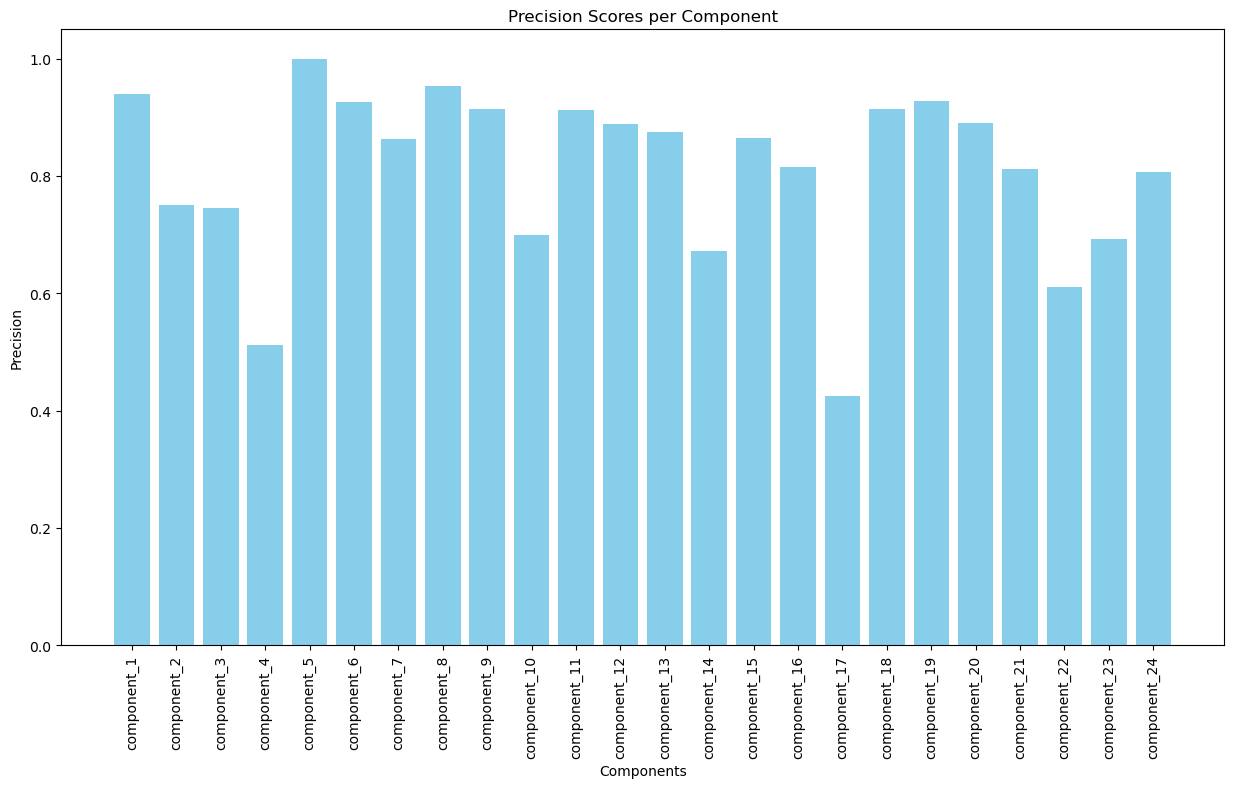

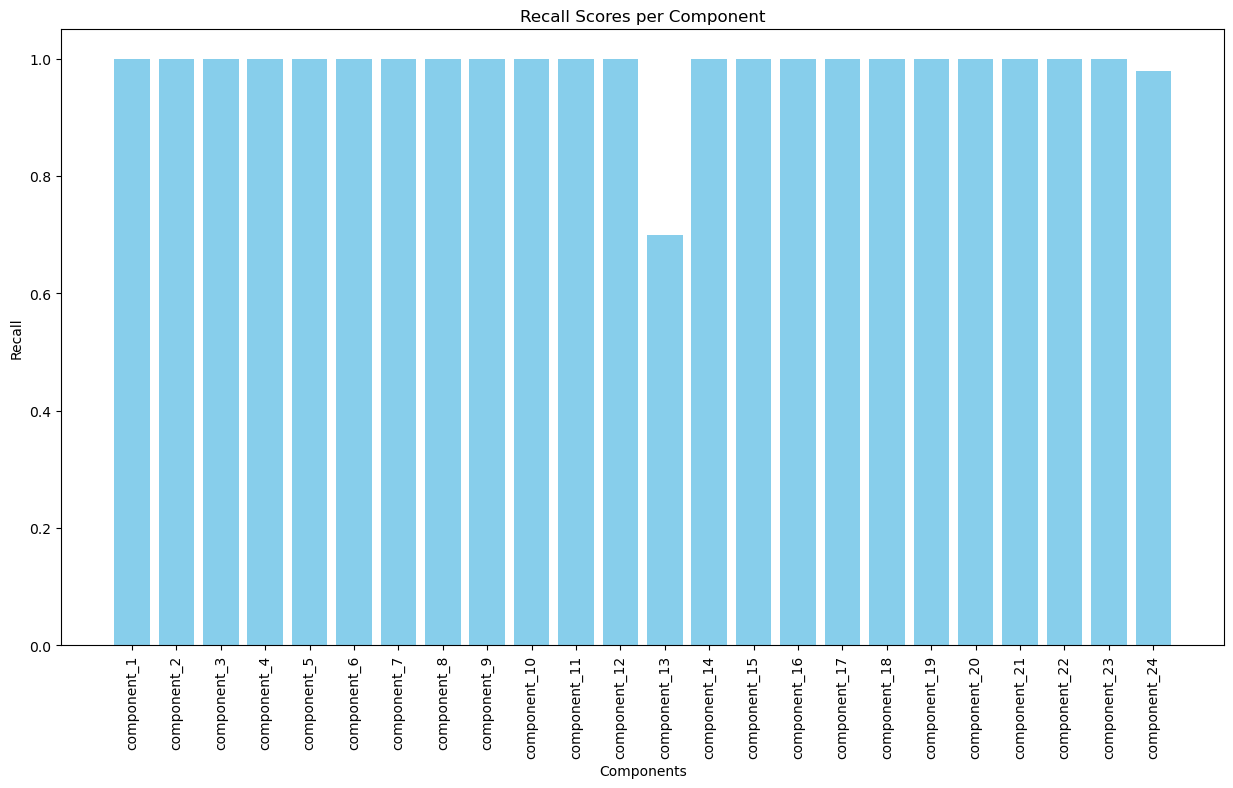

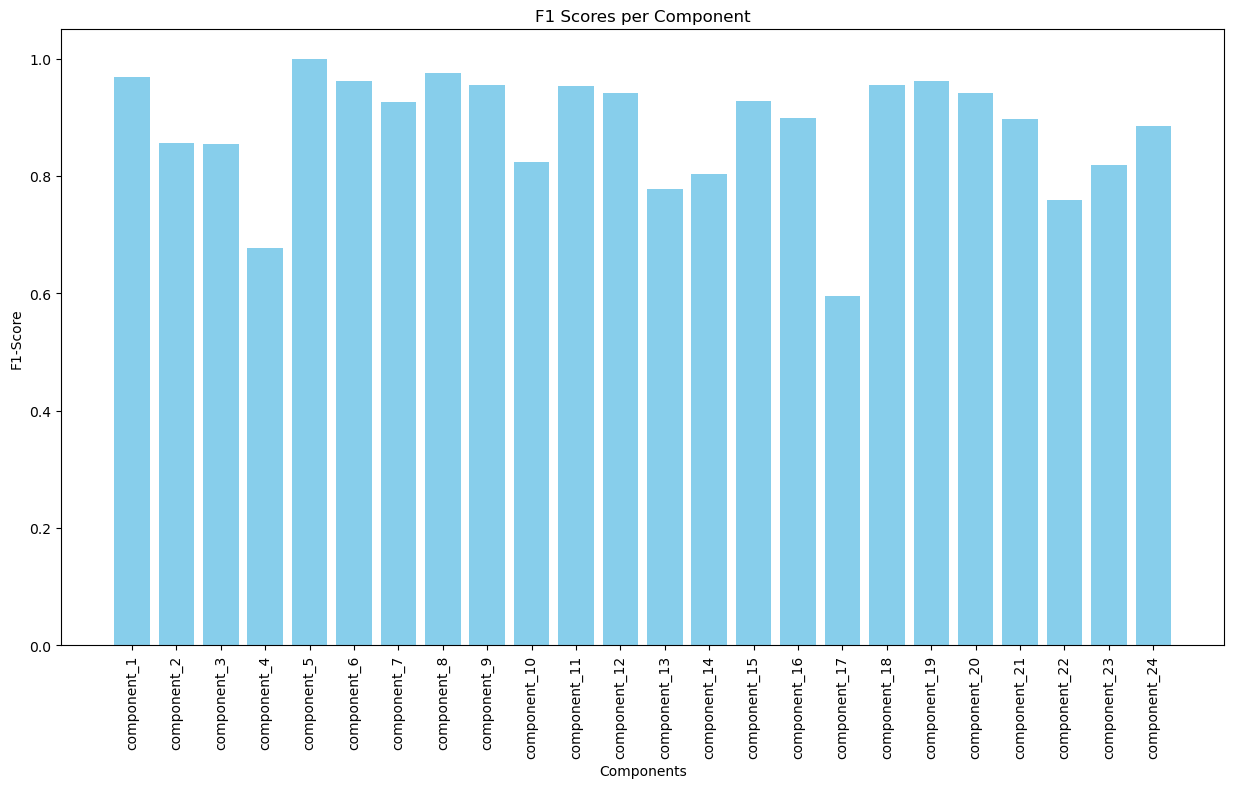

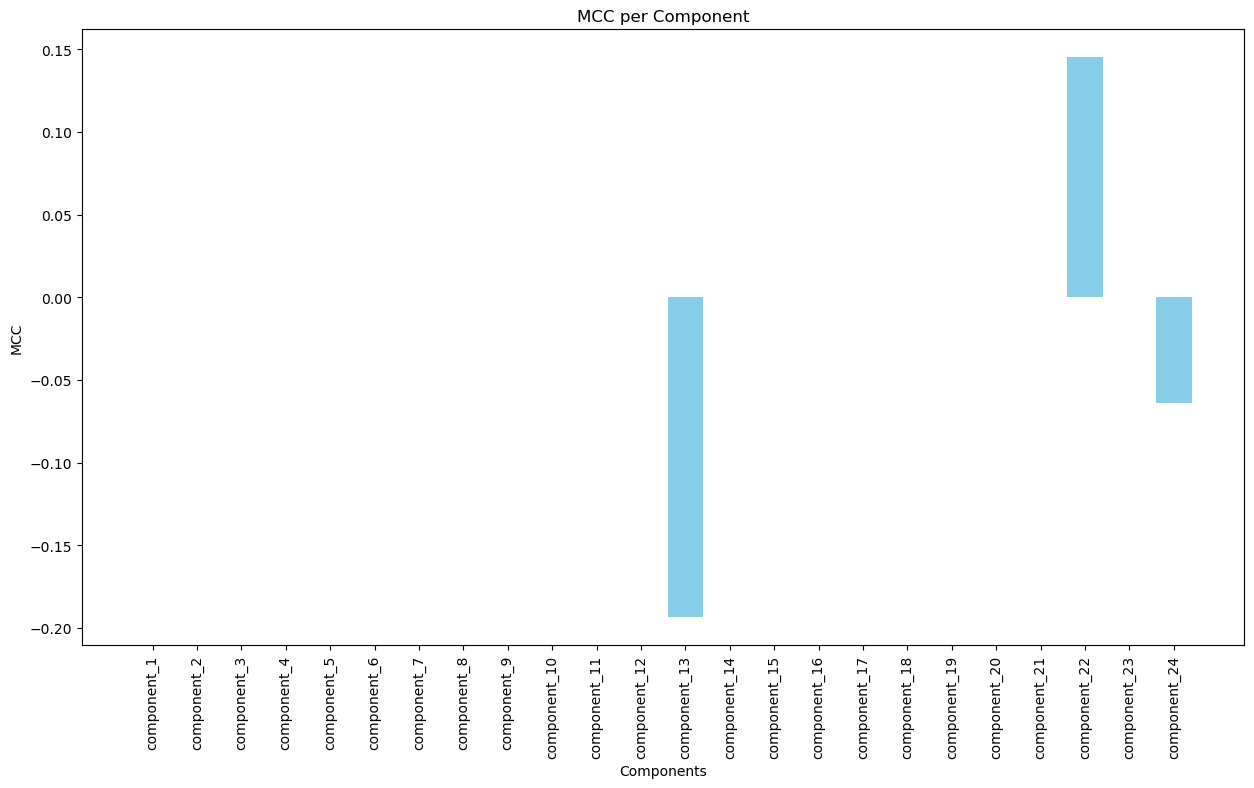

In [195]:
# Plotting bar charts for Precision, Recall, and F1-Score
plot_bar_chart(precisions, 'Precision Scores per Component', 'Precision')
plot_bar_chart(recalls, 'Recall Scores per Component', 'Recall')
plot_bar_chart(f1_scores, 'F1 Scores per Component', 'F1-Score')
plot_bar_chart(mcc_scores, 'MCC per Component', 'MCC')

In [ ]:
# Initialize counters for 0s, 1s, 2s, and 3s
total_count_0s = 0
total_count_1s = 0
total_count_2s = 0
total_count_3s = 0
total_predictions = 0

# Summing up the count of 0s, 1s, 2s, and 3s from all components
for component in components:
    predicted_labels = result_df_aligned[component]
    total_count_0s += np.count_nonzero(predicted_labels == 0)
    total_count_1s += np.count_nonzero(predicted_labels == 1)
    total_count_2s += np.count_nonzero(predicted_labels == 2)
    total_count_3s += np.count_nonzero(predicted_labels == 3)
    total_predictions += len(predicted_labels)

# Calculating the ratios
ratio_of_0s = total_count_0s / total_predictions if total_predictions != 0 else 0
ratio_of_1s = total_count_1s / total_predictions if total_predictions != 0 else 0
ratio_of_2s = total_count_2s / total_predictions if total_predictions != 0 else 0
ratio_of_3s = total_count_3s / total_predictions if total_predictions != 0 else 0

ratio_of_0s, ratio_of_1s, ratio_of_2s, ratio_of_3s

In [ ]:
###### Initialize a list to store the ratio for each component
ratios_per_component = []

# Calculating the ratio of 1s to total predictions for each component
for component in components:
    predicted_labels = result_df_aligned[component].values
    count_1s = np.count_nonzero(predicted_labels == 1)
    total_predictions = len(predicted_labels)

    # Calculate the ratio for this component
    ratio = count_1s / total_predictions if total_predictions != 0 else 0
    ratios_per_component.append(ratio)

# Print the ratio for each component
print("Ratio of 1s to total predictions for each component:")
for i, component in enumerate(components):
    print(f"{component} - Ratio: {ratios_per_component[i]}")

In [ ]:
plot_bar_chart(ratios_per_component, 'Ratios of 1s per Component', 'Ratios of 1s ')